### Import necessary tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

import torch

In [2]:
NUM_LABELS = 919

### Load the targets and the predictions

In [3]:
targets = np.load('../data/y_test.npy')
predictons = torch.load('./test_predictions.pth', map_location=torch.device('cpu')).numpy()

In [4]:
assert targets.shape == predictons.shape

# Compute ROC curve and ROC area for each label

In [5]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(NUM_LABELS):
    fpr[i], tpr[i], _ = roc_curve(targets[:, i], predictons[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

/Users/victor/Library/Caches/pypoetry/virtualenvs/neuralsea-WibNdV2i-py3.8/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


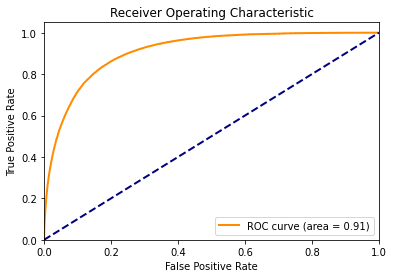

In [6]:
plt.figure()
lw = 2
label_idx = 42

plt.plot(fpr[label_idx], tpr[label_idx], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[label_idx])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Compute micro-average ROC curve and ROC area

In [7]:
fpr['micro'], tpr['micro'], _ = roc_curve(targets.ravel(), predictons.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

# Compute macro-average ROC curve and ROC area

In [8]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(NUM_LABELS)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(NUM_LABELS):
    if not np.any(np.isnan(tpr[i])):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= NUM_LABELS

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

# Plot micro and macro ROC curves

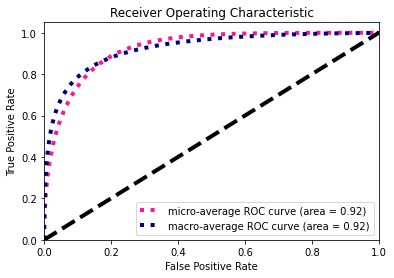

In [12]:
plt.figure()
lw = 4
plt.plot(fpr['micro'], tpr['micro'],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['micro']),
         color='deeppink', linestyle=':', lw=lw)

plt.plot(fpr['macro'], tpr['macro'],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['macro']),
         color='navy', linestyle=':', lw=lw)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Compare to DanQ

In [212]:
danq_aucs = pd.read_csv('./danq_aucs.csv')
danq_roc_aucs = np.delete(np.array(danq_aucs['DanQ ROC AUC']), 598).astype(np.float)

In [213]:
neuralsea_roc_aucs = np.array(list(roc_auc.values())[:919])
neuralsea_roc_aucs = neuralsea_roc_aucs[~np.isnan(neuralsea_roc_aucs)]

(0.6, 1.0)

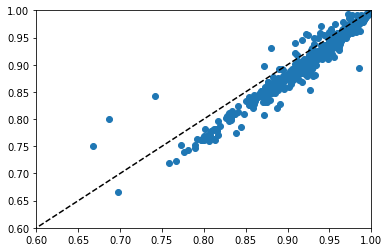

In [214]:
plt.scatter(danq_roc_aucs, neuralsea_roc_aucs)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.6, 1.0])
plt.ylim([0.6, 1.0])

In [215]:
np.mean(neuralsea_roc_aucs)

0.9235602107118415

In [216]:
np.mean(danq_roc_aucs)

0.9383742246929194